# 决策树做回归预测房价


数据集特征: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
数据集形状: (20640, 8)
目标值形状: (20640,)
均方误差 (MSE): 0.4180
均方根误差 (RMSE): 0.6465
决定系数 (R²): 0.6810


Text(0, 0.5, '预测房价')

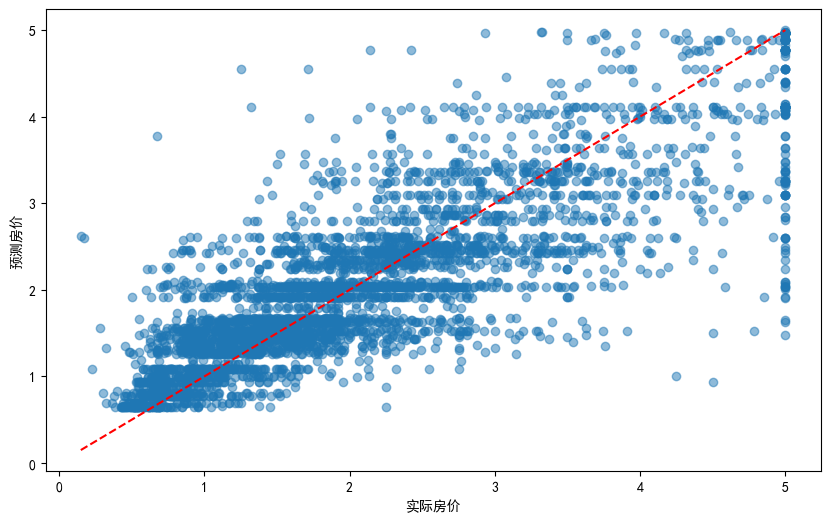

In [3]:
# 在data文件夹下导入加利福利亚数据并用决策树对房价目标值做预测
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 加载加利福尼亚房价数据集
housing = fetch_california_housing(data_home='./data')
X = housing.data
y = housing.target

# 查看数据集基本信息
print("数据集特征:", housing.feature_names)
print("数据集形状:", X.shape)
print("目标值形状:", y.shape)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建决策树回归模型
# 设置更合理的超参数来减小均方误差并提高决定系数，同时防止过拟合
# max_depth限制树的深度防止过拟合
# min_samples_split和min_samples_leaf确保每个分割和叶节点有足够的样本
# max_features限制每次分割考虑的特征数量
# ccp_alpha进行成本复杂度剪枝
dt_regressor = DecisionTreeRegressor(
    max_depth=8,                # 降低树的深度以减少过拟合
    min_samples_split=8,       # 增加分裂所需的最小样本数
    min_samples_leaf=4,         # 设置叶节点最小样本数
    ccp_alpha=0.0001,            # 添加成本复杂度剪枝参数
    random_state=42
)

# 训练模型
dt_regressor.fit(X_train, y_train)

# 预测
y_pred = dt_regressor.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"均方误差 (MSE): {mse:.4f}")
print(f"均方根误差 (RMSE): {rmse:.4f}")
print(f"决定系数 (R²): {r2:.4f}")

# 设置中文字体，解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号


# 可视化预测结果
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('实际房价')
plt.ylabel('预测房价')



In [4]:
# 保存模型
import joblib
joblib.dump(dt_regressor, 'dt_regressor.pkl')

# 加载模型
dt_regressor = joblib.load('dt_regressor.pkl')

# 预测
y_pred = dt_regressor.predict(X_test)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f"均方误差 (MSE): {mse:.4f}")





均方误差 (MSE): 0.4180


In [1]:
# # 在data文件夹下导入泰坦尼克数据并用逻辑回归对是否生存做预测
# 导入必要的库
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 加载泰坦尼克号数据集
titanic_data = pd.read_csv('data/titanic.csv')

# 分析缺失值
print("\n缺失值统计:")
print(titanic_data.isnull().sum())

# 处理缺失数据
# 检查缺失比例
missing_percentage = titanic_data.isnull().mean() * 100
print("\n各特征缺失百分比:")
print(missing_percentage)

# 删除缺失值过多的特征 (通常超过30%的缺失被认为是高缺失率)
high_missing_cols = missing_percentage[missing_percentage > 30].index.tolist()
print(f"\n缺失值过多的特征 (>30%): {high_missing_cols}")
print("这些特征将被排除在模型之外")





缺失值统计:
row.names       0
pclass          0
survived        0
name            0
age           680
embarked      492
home.dest     559
room         1236
ticket       1244
boat          966
sex             0
dtype: int64

各特征缺失百分比:
row.names     0.000000
pclass        0.000000
survived      0.000000
name          0.000000
age          51.789794
embarked     37.471439
home.dest    42.574257
room         94.135567
ticket       94.744859
boat         73.571973
sex           0.000000
dtype: float64

缺失值过多的特征 (>30%): ['age', 'embarked', 'home.dest', 'room', 'ticket', 'boat']
这些特征将被排除在模型之外


In [7]:
print("数据集信息:")
print(titanic_data.info())
titanic_data.head(2)

数据集信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  1313 non-null   int64  
 1   pclass     1313 non-null   object 
 2   survived   1313 non-null   int64  
 3   name       1313 non-null   object 
 4   age        633 non-null    float64
 5   embarked   821 non-null    object 
 6   home.dest  754 non-null    object 
 7   room       77 non-null     object 
 8   ticket     69 non-null     object 
 9   boat       347 non-null    object 
 10  sex        1313 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 113.0+ KB
None


,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female


使用性别和船舱等级的简化模型性能：
准确率: 0.8237
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       206
           1       0.96      0.55      0.70       123

    accuracy                           0.82       329
   macro avg       0.87      0.77      0.79       329
weighted avg       0.85      0.82      0.81       329



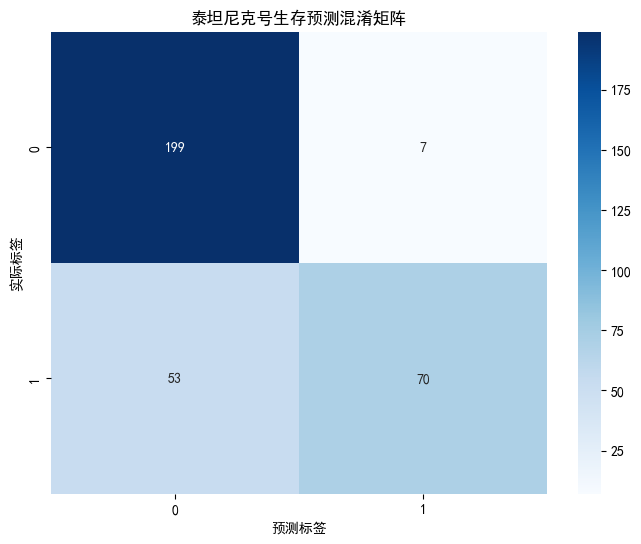

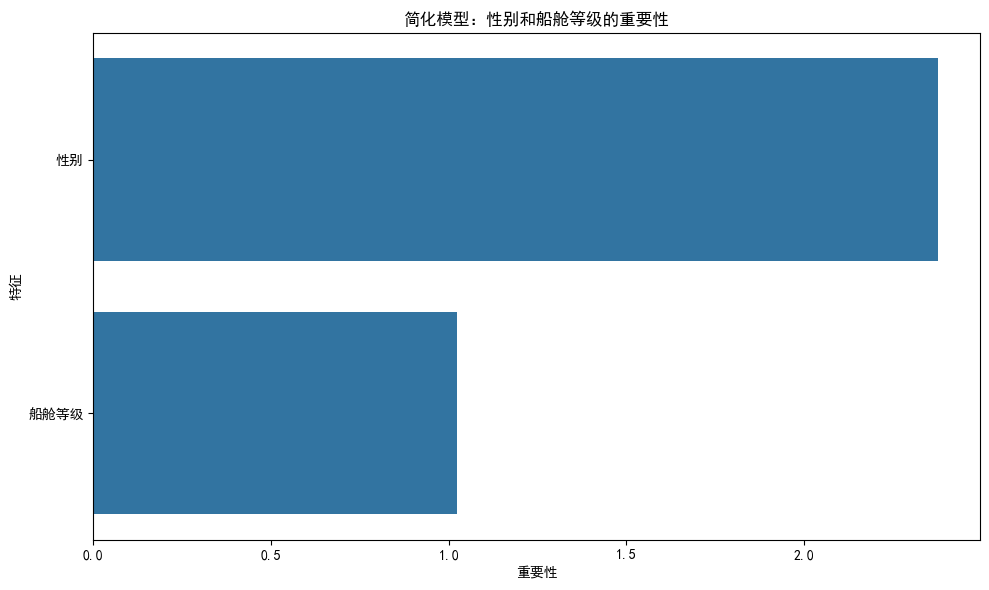

In [21]:
# 数据预处理
# 选择特征和目标变量

# 分析可用特征及其缺失情况
# row.names(0), pclass(0), survived(0), name(0), sex(0) 无缺失
# age(680), embarked(492), home.dest(559), room(1236), ticket(1244), boat(966) 缺失较多

# 创建并训练简化模型
simple_model = LogisticRegression(random_state=42)
simple_model.fit(X_train_simple, y_train_simple)

# 预测并评估
y_pred_simple = simple_model.predict(X_test_simple)
print("使用性别和船舱等级的简化模型性能：")
print(f"准确率: {accuracy_score(y_test_simple, y_pred_simple):.4f}")
print(classification_report(y_test_simple, y_pred_simple))


#可以显示中文
plt.rcParams['font.family'] = ['SimHei']

# 混淆矩阵可视化
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('泰坦尼克号生存预测混淆矩阵')
plt.ylabel('实际标签')
plt.xlabel('预测标签')
plt.show()


# 可视化简化模型的特征重要性
coefficients_simple = simple_model.coef_[0]
feature_importance_simple = pd.DataFrame({
    '特征': ['性别', '船舱等级'],
    '重要性': np.abs(coefficients_simple)
})
feature_importance_simple = feature_importance_simple.sort_values('重要性', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='重要性', y='特征', data=feature_importance_simple)
plt.title('简化模型：性别和船舱等级的重要性')
plt.tight_layout()
plt.show()


扩展模型：使用更多特征并处理缺失值
使用扩展特征的模型性能：
准确率: 0.8146
              precision    recall  f1-score   support

           0       0.79      0.95      0.87       206
           1       0.88      0.59      0.70       123

    accuracy                           0.81       329
   macro avg       0.84      0.77      0.78       329
weighted avg       0.83      0.81      0.80       329



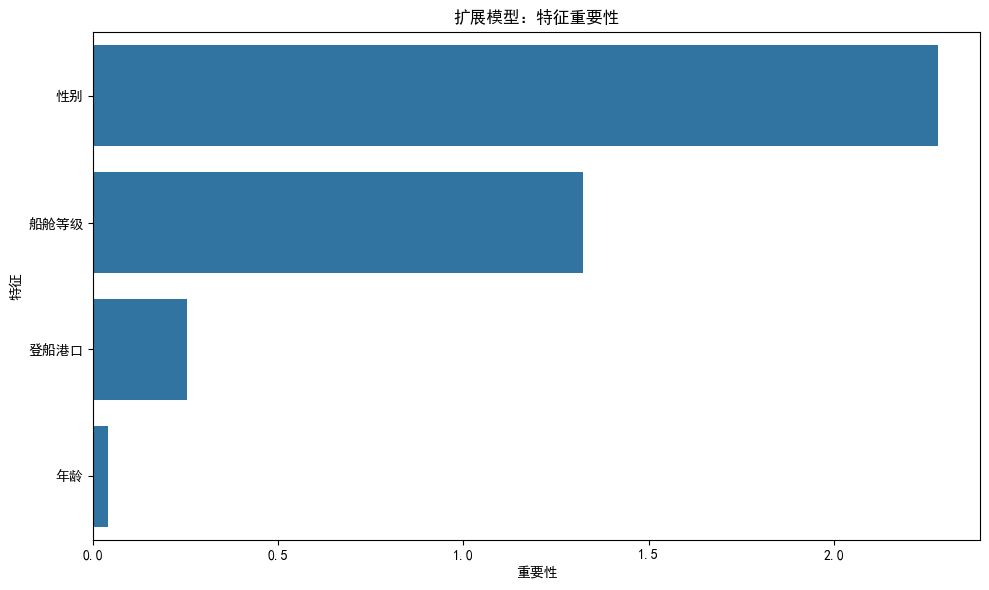

In [28]:
# 使用更多特征并处理缺失值来提高模型性能
print("扩展模型：使用更多特征并处理缺失值")

# 选择更多有用的特征
X_extended = titanic_data[['sex', 'pclass', 'age', 'embarked']].copy()

# 处理分类特征
X_extended.loc[:, 'sex'] = X_extended['sex'].map({'male': 0, 'female': 1})
X_extended.loc[:, 'pclass'] = X_extended['pclass'].map({'1st': 0, '2nd': 1, '3rd': 2})
X_extended.loc[:, 'embarked'] = X_extended['embarked'].map({'Southampton': 0, 'Cherbourg': 1, 'Queenstown': 2})


# 根据性别和舱位分组填充年龄缺失值
# 创建年龄填充函数
def fill_age(data):
    # 创建一个数据副本
    df = data.copy()
    
    # 计算每个性别和舱位组合的年龄众数
    # 计算每个性别和舱位组合的登船港口众数
    age_modes = {}
    for (sex, pclass), group in df.groupby(['sex', 'pclass']):
        if not group['age'].isna().all():  # 确保组内有非缺失值
            age_modes[(sex, pclass)] = group['age'].mode().iloc[0]
    
    # 计算每个性别和舱位组合的登船港口众数
    embarked_modes = {}
    for (sex, pclass), group in df.groupby(['sex', 'pclass']):
        if not group['embarked'].isna().all():  # 确保组内有非缺失值
            embarked_modes[(sex, pclass)] = group['embarked'].mode().iloc[0]

    # 对每个缺失的年龄值，根据对应的性别和舱位填充
    for (sex, pclass), age_mode in age_modes.items():
        mask = (df['sex'] == sex) & (df['pclass'] == pclass) & df['age'].isna()
        df.loc[mask, 'age'] = age_mode
    
    # 对每个缺失的登船港口值，根据对应的性别和舱位填充
    for (sex, pclass), embarked_mode in embarked_modes.items():
        mask = (df['sex'] == sex) & (df['pclass'] == pclass) & df['embarked'].isna()
        df.loc[mask, 'embarked'] = embarked_mode
    
    # 如果仍有缺失值，使用年龄用全局中位数，登船港口用全局众数填充
    if df['age'].isna().sum() > 0:
        df['age'].fillna(df['age'].median(), inplace=True)
    if df['embarked'].isna().sum() > 0:
        df['embarked'].fillna(df['embarked'].mode().iloc[0], inplace=True)

    return df

# 应用年龄填充函数
X_extended = fill_age(X_extended)

# 划分训练集和测试集
X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(
    X_extended, y, test_size=0.25, random_state=42
)

# 创建并训练扩展模型
extended_model = LogisticRegression(random_state=42)
extended_model.fit(X_train_ext, y_train_ext)

# 预测并评估扩展模型
y_pred_ext = extended_model.predict(X_test_ext)
print("使用扩展特征的模型性能：")
print(f"准确率: {accuracy_score(y_test_ext, y_pred_ext):.4f}")
print(classification_report(y_test_ext, y_pred_ext))

# 可视化扩展模型的特征重要性
coefficients_ext = extended_model.coef_[0]
feature_importance_ext = pd.DataFrame({
    '特征': ['性别', '船舱等级', '年龄', '登船港口'],
    '重要性': np.abs(coefficients_ext)
})
feature_importance_ext = feature_importance_ext.sort_values('重要性', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='重要性', y='特征', data=feature_importance_ext)
plt.title('扩展模型：特征重要性')
plt.tight_layout()
plt.show()